In [9]:
from kwak_replication_ep import ElectricPumpCycle
from kwak_replication_gg import GasGeneratorCycle
import matplotlib.pyplot as plt
import numpy as np

arguments = {
    'thrust': 75E3, 'burn_time': 500,
    # 'combustion_chamber_pressure': 7.0E6, 'mass_mixture_ratio': 2.45,
    'exit_pressure': .002E6, 'max_acceleration': 4.5, 'heat_ratio_pressurant': 1.667,
    'pressurant_initial_pressure': 27E6, 'pressurant_final_pressure': 5E6,
    'oxidizer_initial_pressure': .4E6, 'fuel_initial_pressure': .25E6, 'fuel_pump_pressure_factor': 1.55,
    'oxidizer_pump_pressure_factor': 1.15, 'pressurant_gas_constant': 2080,
    'pressurant_initial_temperature': 100, 'oxidizer_pump_efficiency': .66, 'fuel_pump_efficiency': .61,
    'pressurant_margin_factor': 1.1, 'pressurant_tank_structural_factor': 1.2,
    'propellant_margin_factor': 1.01, 'tanks_structural_factor': 2.5, 'ullage_volume_factor': 1.08,
    'oxidizer_density': 1126.1, 'fuel_density': 804.2, 'tanks_material_density': 2850,
    'pressurant_tank_material_density': 4430, 'tanks_yield_strength': 250E6,
    'pressurant_tank_yield_strength': 1100E6, 'verbose': True
}

gg_arguments = {
    'gg_gas_specific_heat': 2024.7, 'heat_ratio_gg_gas': 1.16, 'mass_mixture_ratio_gg': 0.320,
    'turbine_pressure_ratio': 27, 'gas_constant_gg_gas': 274.1, 'turbine_inlet_temperature': 900,
    'gas_generator_stay_time': 10E-3, 'turbopump_specific_power': 13.5E3, 'turbine_efficiency': .52,
    'gg_structural_factor': 2.5, 'gg_material_density': 8220, 'gg_yield_strength': 550E6, 'gg_thrust_contribution': 0.01

}

ep_arguments = {
    'fuel_pump_specific_power': 15E3, 'oxidizer_pump_specific_power': 20E3, 'fuel_specific_heat': 2009,
    'electric_motor_specific_power': 5.3E3, 'inverter_specific_power': 60E3, 'battery_specific_power': 6.95E3,
    'battery_specific_energy': 198 * 3600, 'electric_motor_efficiency': .95, 'inverter_efficiency': .85,
    'battery_structural_factor': 1.2, 'coolant_allowable_temperature_change': 40,
}

In [42]:
n_detail = 20
mmr_range = np.linspace(2.00, 4.00, n_detail)
pcc_range = np.logspace(6, 7, n_detail)
initial_mass_matrix = np.array([0] * n_detail)

m0_list = [[ElectricPumpCycle(mass_mixture_ratio=mmr,
                                               combustion_chamber_pressure=pcc,
                                               **arguments,
                                               **ep_arguments
                                               ).mass
                        for pcc in pcc_range]
           for mmr in mmr_range]

reading cea isp data files for LO2_NASA / RP1_NASA 49600 times
reading cea isp data files for LO2_NASA / RP1_NASA 49700 times
reading cea isp data files for LO2_NASA / RP1_NASA 49800 times
reading cea isp data files for LO2_NASA / RP1_NASA 49900 times
reading cea isp data files for LO2_NASA / RP1_NASA 50000 times
reading cea isp data files for LO2_NASA / RP1_NASA 50100 times
reading cea isp data files for LO2_NASA / RP1_NASA 50200 times
reading cea isp data files for LO2_NASA / RP1_NASA 50300 times
reading cea isp data files for LO2_NASA / RP1_NASA 50400 times
reading cea isp data files for LO2_NASA / RP1_NASA 50500 times
reading cea isp data files for LO2_NASA / RP1_NASA 50600 times
reading cea isp data files for LO2_NASA / RP1_NASA 50700 times
reading cea isp data files for LO2_NASA / RP1_NASA 50800 times
reading cea isp data files for LO2_NASA / RP1_NASA 50900 times
reading cea isp data files for LO2_NASA / RP1_NASA 51000 times
reading cea isp data files for LO2_NASA / RP1_NASA 5110

In [55]:
X, Y = np.meshgrid(pcc_range, mmr_range)
Z = np.array(m0_list)

Text(0.5, 0.92, 'Opt_Plot')

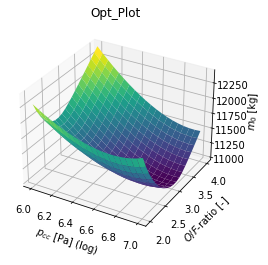

In [61]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(np.log10(X), Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('$p_{cc}$ [Pa] (log)')
ax.set_ylabel('$O/F$-ratio [-]')
ax.set_zlabel('$m_0$ [kg]')
ax.set_title('EP_Plot')
